Import Libraries and read the CSV file

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
import prince
import seaborn as sns
import csv
import sklearn
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

sns.set()

customer_data = pd.read_csv('customer_data.csv')
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data to understand the fields.

In [146]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look at the data types in the data frame

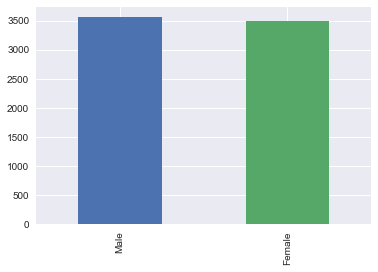

In [147]:
gender_counts = customer_data.gender.value_counts()
gender_counts.plot.bar()

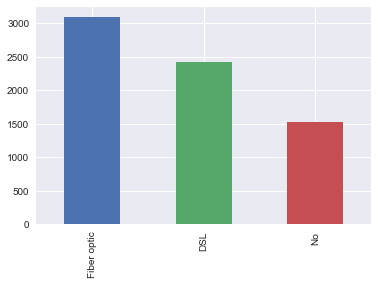

In [148]:
internet_counts = customer_data.InternetService.value_counts()
internet_counts.plot.bar()

In [149]:
internet_counts

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

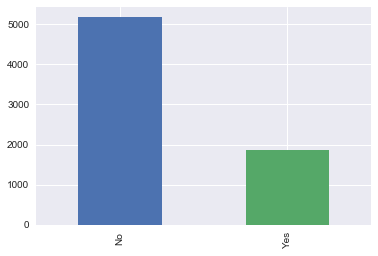

In [150]:
churn_counts = customer_data.Churn.value_counts()
churn_counts.plot.bar()

In [151]:
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

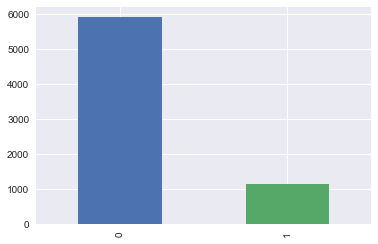

In [152]:
senior_counts = customer_data.SeniorCitizen.value_counts()
senior_counts.plot.bar()

Where 1 = Yes and 2 = No

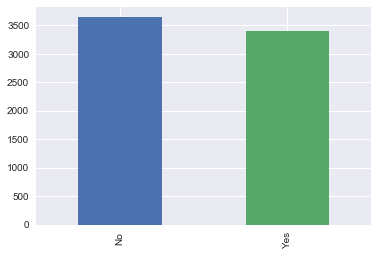

In [153]:
partner_counts = customer_data.Partner.value_counts()
partner_counts.plot.bar()

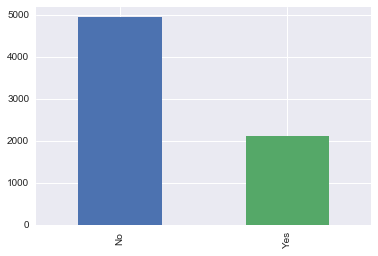

In [154]:
dependent_count = customer_data.Dependents.value_counts()
dependent_count.plot.bar()

In [155]:
customer_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Mean is 32, and Median is 29, which is not too far off and the Std. Deviation is 24.5 so it's understandable that we would have a max at 72, and a top 25% of 55.

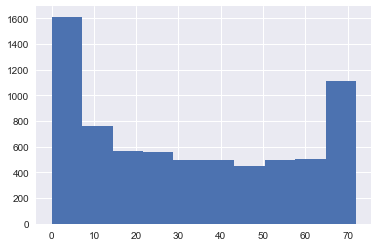

In [156]:
customer_data.tenure.hist()

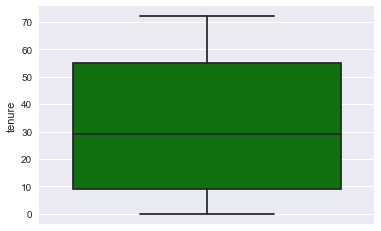

In [157]:
sns.boxplot(customer_data.tenure, color='green', orient = 'v')

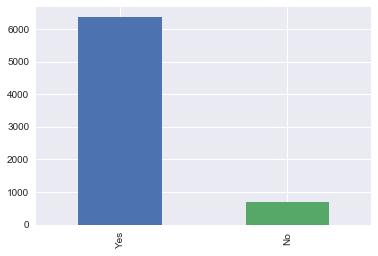

In [158]:
phone_count = customer_data.PhoneService.value_counts()
phone_count.plot.bar()

In [159]:
phone_count

Yes    6361
No      682
Name: PhoneService, dtype: int64

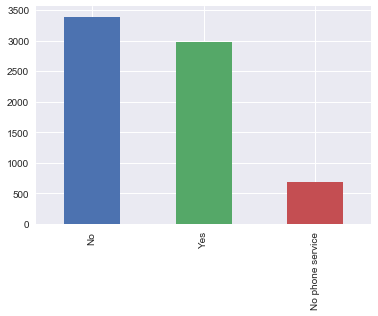

In [160]:
multi_line_count = customer_data.MultipleLines.value_counts()
multi_line_count.plot.bar()

In [161]:
multi_line_count

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

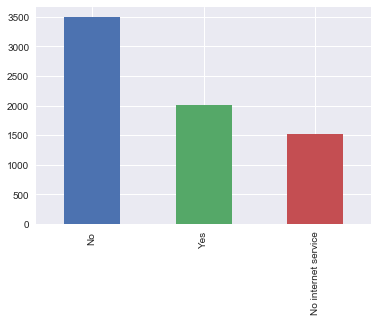

In [162]:
ols_count = customer_data.OnlineSecurity.value_counts()
ols_count.plot.bar()

In [163]:
ols_count

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

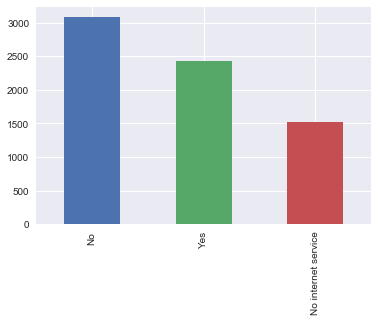

In [164]:
olb_count = customer_data.OnlineBackup.value_counts()
olb_count.plot.bar()

In [165]:
olb_count

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

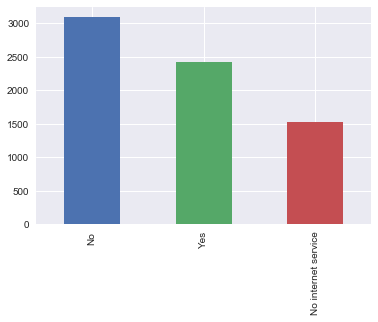

In [166]:
device_protection_count = customer_data.DeviceProtection.value_counts()
device_protection_count.plot.bar()

In [167]:
device_protection_count

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

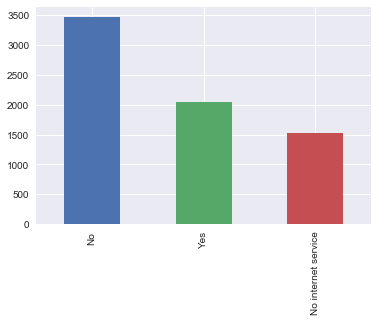

In [168]:
ts_count = customer_data.TechSupport.value_counts()
ts_count.plot.bar()

In [169]:
ts_count

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

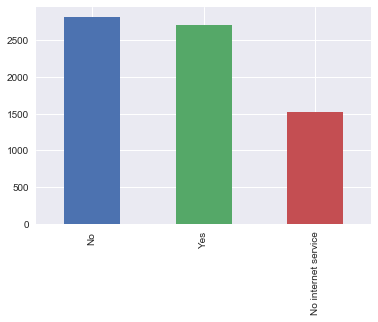

In [170]:
streaming_tv_counts = customer_data.StreamingTV.value_counts()
streaming_tv_counts.plot.bar()

In [171]:
streaming_tv_counts

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

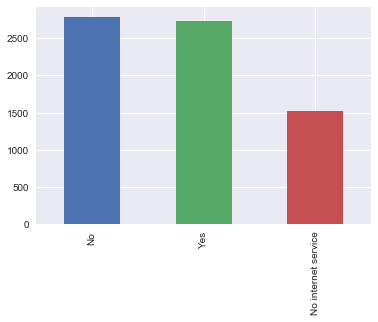

In [172]:
streaming_movie_counts = customer_data.StreamingMovies.value_counts()
streaming_movie_counts.plot.bar()

In [173]:
streaming_movie_counts

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

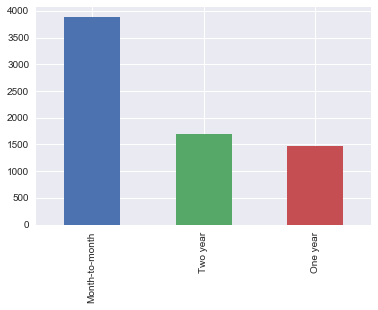

In [174]:
contract_counts = customer_data.Contract.value_counts()
contract_counts.plot.bar()

In [175]:
contract_counts

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

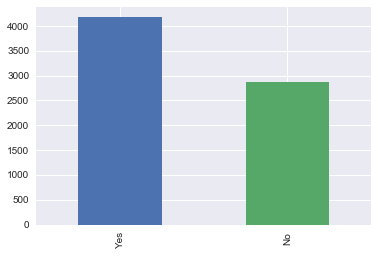

In [176]:
paperless_count = customer_data.PaperlessBilling.value_counts()
paperless_count.plot.bar()

In [177]:
paperless_count

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

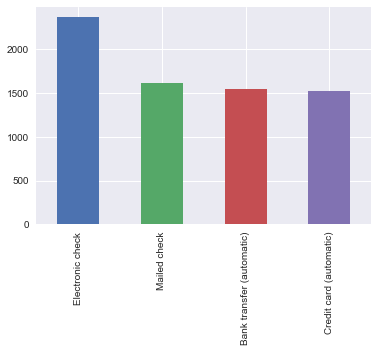

In [178]:
payment_method_counts = customer_data.PaymentMethod.value_counts()
payment_method_counts.plot.bar()

In [179]:
payment_method_counts

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

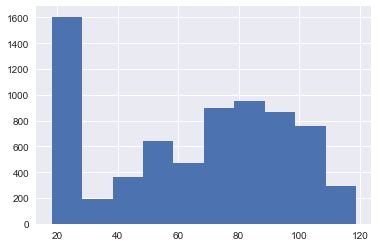

In [180]:
customer_data.MonthlyCharges.hist()

In [181]:
customer_data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Looks like the MEAN charges are \$64.76 or approx. $65/month, but the median is closer to 70.The Standart Deviation accounts for the 25th and 75th quartiles, and the Max appears to be an outlier.

In [182]:
customer_data.MonthlyCharges.mode()

0    20.05
dtype: float64

The most common amount is \$20/month.

In [183]:
customer_data.TotalCharges = customer_data.TotalCharges.map(lambda x: x if x != ' ' else 0)
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.TotalCharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [184]:
customer_data.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

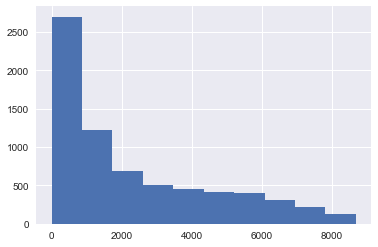

In [185]:
customer_data.TotalCharges.hist()

In [186]:
crosstabs = []
for c in customer_data.columns:
    if c != 'Churn' and c != 'customerID' and c != 'tenure' and c != 'MonthlyCharges' and c != 'TotalCharges':
        crosstabs.append(pd.crosstab(customer_data.Churn, customer_data[c], margins=True))
for c in crosstabs:
    print(c)

gender  Female  Male   All
Churn                     
No        2549  2625  5174
Yes        939   930  1869
All       3488  3555  7043
SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043
Partner    No   Yes   All
Churn                    
No       2441  2733  5174
Yes      1200   669  1869
All      3641  3402  7043
Dependents    No   Yes   All
Churn                       
No          3390  1784  5174
Yes         1543   326  1869
All         4933  2110  7043
PhoneService   No   Yes   All
Churn                        
No            512  4662  5174
Yes           170  1699  1869
All           682  6361  7043
MultipleLines    No  No phone service   Yes   All
Churn                                            
No             2541               512  2121  5174
Yes             849               170   850  1869
All            3390               682  2971  7043
InternetService   DSL  Fiber o

Now that we have our contingency tables, let's go through each of them to check if there's a group that is significantly churning more than the others.

In [187]:
crosstabs[0]

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


Looking at the Contingency Table, we can visually determine that the two populations of male and female are roughly equivalent, and the proportions to which they churn are also roughtly equivalent, but in the interest of being thourough, I will run the Chi Squared Test to determine if these are statistically significantly different.

In [188]:
chiSq, p, dof,expected = scipy.stats.chi2_contingency(crosstabs[0].values)
print(f'ChiSquare {chiSq} P: {p}')

ChiSquare 0.522366503358827 P: 0.9712873885521255


As Mentioned, visually you can tell there is no statistical difference in the populations, and the ChiSquare value and P value confirms this.

In [189]:
expected

array([[2562.38989067, 2611.61010933, 5174.        ],
       [ 925.61010933,  943.38989067, 1869.        ],
       [3488.        , 3555.        , 7043.        ]])

Even in the context of the expected values, there appears to be nothing statistically interesting in this analysis.

In [190]:
crosstabs[1]

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


Visually we can tell that non seniors appear to be churning slower than seniors. Mainly because there are lower overall number of seniors

In [191]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[1].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 160.35213184520632, P: 1.2285843790939117e-33


We can tell that the results in our sample data is Significant, especially considering how miniscule the P Value is. We can state clearly that there are some irregular things happening with our Seniors.

In [192]:
expected

array([[4335.05239245,  838.94760755, 5174.        ],
       [1565.94760755,  303.05239245, 1869.        ],
       [5901.        , 1142.        , 7043.        ]])

This is reinforced by our expected table of values which states that by pure chance, we should be seeing less Seniors churning. (Almost 200 less in the dataset)

In [193]:
crosstabs[2]

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


Visually we can see that Customers that are receiving partner deals for services are generally more loyal with only about 700 out of 3400 churning. When compared to Those that are not receiving partner deals are churning a full 1/3 of the time. 

In [194]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[2].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 159.41452843242655, P: 1.9520350404613758e-33


Our Chi-Squared analysis confirms this with a P Value extremely close to Zero.

In [195]:
expected

array([[2674.78830044, 2499.21169956, 5174.        ],
       [ 966.21169956,  902.78830044, 1869.        ],
       [3641.        , 3402.        , 7043.        ]])

From the values of the expected table, we can clearly see that partner programs are extremely effective at retaining customers. (We can see an overperformance of around 300.)

In [196]:
crosstabs[3]

Dependents,No,Yes,All
Churn,,,
No,3390,1784,5174
Yes,1543,326,1869
All,4933,2110,7043


The issue with this contingency table is that the overall numbers are a little unclear, so I will also provide a table with matching percentages.

In [197]:
pd.crosstab(customer_data.Churn, customer_data.Dependents,margins=True, normalize=True)

Dependents,No,Yes,All
Churn,,,
No,0.481329,0.253301,0.73463
Yes,0.219083,0.046287,0.26537
All,0.700412,0.299588,1.00000


Now we can see that only about 30% of customers actually have Dependents at all. Of those with dependents, 15% churn where as those without 30% are likely to churn. This makes sense as those with dependents are more likely to be less focused on phone service where someone without could potentially be always looking for a better deal.

In [198]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[3].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 189.94033391334852, P: 5.4590465250260434e-40


Our P Value confirms that this isn't from chance that those with dependents don't churn as much as those that don't

In [199]:
expected

array([[3623.93042737, 1550.06957263, 5174.        ],
       [1309.06957263,  559.93042737, 1869.        ],
       [4933.        , 2110.        , 7043.        ]])

Our expected values also illustrate that customers with dependents should be churning more, if it were governed by chance

In [200]:
crosstabs[4]

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


Visually we can see that most customers have phone service, and a good third of users are churning there, while those without phone service are churning equally, or slightly less. Let's take a look at the ChiSquared analysis

In [201]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[4].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 1.0044084772333213, P: 0.9091267853074723


And the ChiSquared analysis shows that the differences between those that do and don't have phone services are not statistically significant.

In [202]:
crosstabs[5]

MultipleLines,No,No phone service,Yes,All
Churn,,,,
No,2541,512,2121,5174
Yes,849,170,850,1869
All,3390,682,2971,7043


Since those with multiple lines are a subclass of those with phone service, let's re-evaluate our crosstable without the "No Phone Service" Category.

In [203]:
multi_line = customer_data[customer_data.MultipleLines != 'No phone service']
less_non_phone_users = pd.crosstab(multi_line.Churn, multi_line.MultipleLines, margins=True)
less_non_phone_users

MultipleLines,No,Yes,All
Churn,,,
No,2541,2121,4662
Yes,849,850,1699
All,3390,2971,6361


Here we can see a little more clearly that of customers that have phone service, we have roughly the same rate of churn for roughly the same size of population. We appear to have a rougly even split among those that do and those that don't have multiple lines of service.

In [204]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(less_non_phone_users)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 10.283453792632583, P: 0.03591425668303589


The statistic shows that we do have a significant difference from chance. Let's look at the expected values.

In [205]:
expected

array([[2484.5433108, 2177.4566892, 4662.       ],
       [ 905.4566892,  793.5433108, 1699.       ],
       [3390.       , 2971.       , 6361.       ]])

This shows us that our data isn't far all that far from the expected counts, but is still statistically significant.

In [206]:
crosstabs[6]

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


This is a little unclear as there is the mixture of classes against the simple binary of Yes a customer has internet, and no the customer does not. Let's see if we can merge the columns DSL and FiberOptic.Let's get our original data and copy it.

In [207]:
internet_data = customer_data
internet_data['InternetServiceYN'] = internet_data.InternetService.map({'DSL':'Yes', 'Fiber optic': 'Yes', 'No': 'No'})
internet_tab = pd.crosstab(internet_data.Churn,internet_data['InternetServiceYN'], margins=True )
internet_tab

InternetServiceYN,No,Yes,All
Churn,,,
No,1413,3761,5174
Yes,113,1756,1869
All,1526,5517,7043


From the looks of it, we have a large portion of Internet subscribers with about a third of them churning, and non-internet customers that appear to be churning a lot less.

In [208]:
pd.crosstab(internet_data.Churn, internet_data['InternetServiceYN'], margins=True, normalize=True)

InternetServiceYN,No,Yes,All
Churn,,,
No,0.200625,0.534005,0.73463
Yes,0.016044,0.249326,0.26537
All,0.216669,0.783331,1.00000


So, it appears that almost 80% of customers are internet users, and 26% of total users are churning with 24 of those 26% being Internet Users. This is by far our largest correlation so far.

In [209]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(internet_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 365.7715640851134, P: 6.890681737550473e-78


Our ChiSquared statistic and P Value also confirm this intuitive analysis. Let's drill in further to see if there is a specific type of Internet Customer that is churning faster.

In [211]:
expected

array([[1121.04557717, 4052.95442283, 5174.        ],
       [ 404.95442283, 1464.04557717, 1869.        ],
       [1526.        , 5517.        , 7043.        ]])

In [212]:
all_internet = customer_data[customer_data.InternetService != 'No']
all_internet_tab = pd.crosstab(all_internet.Churn, all_internet.InternetService, margins=True)
all_internet_tab

InternetService,DSL,Fiber optic,All
Churn,,,
No,1962,1799,3761
Yes,459,1297,1756
All,2421,3096,5517


So, from this, it appears that The company's fiber subscribers are churning the most, with roughly half of the population churning. Let's see what our statistics have to say.

In [213]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(all_internet_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 329.31954599970544, P: 5.1095923936356084e-70


In [214]:
expected

array([[1650.42251223, 2110.57748777, 3761.        ],
       [ 770.57748777,  985.42251223, 1756.        ],
       [2421.        , 3096.        , 5517.        ]])

It is apparrent that the Fiber subscribers are leaving for better offers elsewhere. We will explore this more in depth later.

In [58]:
crosstabs[7]

OnlineSecurity,No,No internet service,Yes,All
Churn,,,,
No,2037,1413,1724,5174
Yes,1461,113,295,1869
All,3498,1526,2019,7043


In [60]:
ols_data = customer_data[customer_data.OnlineSecurity != 'No internet service']
ols_tab = pd.crosstab(ols_data.Churn, ols_data.OnlineSecurity, margins=True)
ols_tab

OnlineSecurity,No,Yes,All
Churn,,,
No,2037,1724,3761
Yes,1461,295,1756
All,3498,2019,5517


Initial Analysis seems to suggest that those with Online Security should churn at a lower rate. Let's take a look at the statistics.

In [61]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(ols_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 435.0586778867463, P: 7.374255772533968e-93


and the statistics appear to back up this assumption. 

In [62]:
crosstabs[8]

OnlineBackup,No,No internet service,Yes,All
Churn,,,,
No,1855,1413,1906,5174
Yes,1233,113,523,1869
All,3088,1526,2429,7043


In [63]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[8].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 601.8127901134089, P: 9.47834366883598e-127


In [64]:
olb_data = customer_data[customer_data.OnlineBackup != 'No internet service']
olb_tab = pd.crosstab(olb_data.Churn, olb_data.OnlineBackup, margins=True)
olb_tab

OnlineBackup,No,Yes,All
Churn,,,
No,1855,1906,3761
Yes,1233,523,1756
All,3088,2429,5517


We also seem to see that an internet user that doesn't have online backup is more likely to churn, and this is significant. Let's confirm with statistics.

In [65]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(olb_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 212.07346569099087, P: 9.514038193047232e-45


This is confirmed with the high Chi Squared Value and P Values.

In [66]:
crosstabs[9]

DeviceProtection,No,No internet service,Yes,All
Churn,,,,
No,1884,1413,1877,5174
Yes,1211,113,545,1869
All,3095,1526,2422,7043


In [67]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[9].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 558.419369407389, P: 2.1613069878600708e-117


In [68]:
dev_data = customer_data[customer_data.DeviceProtection != 'No internet service']
dev_tab = pd.crosstab(dev_data.Churn, dev_data.DeviceProtection, margins=True)
dev_tab

DeviceProtection,No,Yes,All
Churn,,,
No,1884,1877,3761
Yes,1211,545,1756
All,3095,2422,5517


It appears that there is also a correlation with Internet Subscribers who don't have Device Protection Churning more. 

In [69]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(dev_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 173.08623760309035, P: 2.2752183015579087e-36


This appears to be confirmed in the statistics as well.

In [70]:
crosstabs[10]

TechSupport,No,No internet service,Yes,All
Churn,,,,
No,2027,1413,1734,5174
Yes,1446,113,310,1869
All,3473,1526,2044,7043


In [71]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[10].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 828.1970684587393, P: 1.2432731207524936e-175


In [72]:
expected

array([[2551.37043873, 1121.04557717, 1501.5839841 , 5174.        ],
       [ 921.62956127,  404.95442283,  542.4160159 , 1869.        ],
       [3473.        , 1526.        , 2044.        , 7043.        ]])

In [73]:
tech_data = customer_data[customer_data.TechSupport != 'No internet service']
tech_tab = pd.crosstab(tech_data.Churn, tech_data.TechSupport, margins=True)
tech_tab

TechSupport,No,Yes,All
Churn,,,
No,2027,1734,3761
Yes,1446,310,1756
All,3473,2044,5517


It's starting to look like our clients that take advantage of all the premium features feel more invested. Tech support is no exception to this. Let's confirm that with the statistics.

In [74]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(tech_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 415.4705556590498, P: 1.262731447133291e-88


We're once again confirmed in our assumptions that the data is not happening by chance.

In [75]:
crosstabs[11]

StreamingTV,No,No internet service,Yes,All
Churn,,,,
No,1868,1413,1893,5174
Yes,942,113,814,1869
All,2810,1526,2707,7043


In [76]:
tv_data = customer_data[customer_data.StreamingTV != 'No internet service']
tv_tab = pd.crosstab(tv_data.Churn, tv_data.StreamingTV, margins=True)
tv_tab

StreamingTV,No,Yes,All
Churn,,,
No,1868,1893,3761
Yes,942,814,1756
All,2810,2707,5517


It appears however, that customers are split on TV, and it has no effect on customer churn.

In [77]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(tv_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 7.576150643430983, P: 0.1083978739917602


and our statistics confirms this.

In [78]:
crosstabs[12]

StreamingMovies,No,No internet service,Yes,All
Churn,,,,
No,1847,1413,1914,5174
Yes,938,113,818,1869
All,2785,1526,2732,7043


In [79]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[12].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 375.66147934526555, P: 4.756349955118015e-78


In [80]:
movie_data = customer_data[customer_data.StreamingMovies != 'No internet service']
movie_tab = pd.crosstab(movie_data.Churn, movie_data.StreamingMovies, margins=True)
movie_tab

StreamingMovies,No,Yes,All
Churn,,,
No,1847,1914,3761
Yes,938,818,1756
All,2785,2732,5517


Streaming Movies appears to be none that important in the decision to churn.

In [81]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(movie_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 8.88568763983309, P: 0.0640211273902098


In [82]:
expected

array([[1898.56534348, 1862.43465652, 3761.        ],
       [ 886.43465652,  869.56534348, 1756.        ],
       [2785.        , 2732.        , 5517.        ]])

it's barely insignificant.

In [83]:
crosstabs[13]

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [84]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[12].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 375.66147934526555, P: 4.756349955118015e-78


This is going to require us to split off the categories in order to determine which is statistically different.

In [85]:
ct_m2m_1y_data = customer_data[customer_data.Contract != 'Two year']
ct_m2m_1y_tab = pd.crosstab(ct_m2m_1y_data.Churn, ct_m2m_1y_data.Contract, margins=True)
ct_m2m_1y_tab

Contract,Month-to-month,One year,All
Churn,,,
No,2220,1307,3527
Yes,1655,166,1821
All,3875,1473,5348


In [86]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(ct_m2m_1y_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 469.8074788942832, P: 2.266402313652666e-100


Clearly a significant difference.

In [87]:
expected

array([[2555.55815258,  971.44184742, 3527.        ],
       [1319.44184742,  501.55815258, 1821.        ],
       [3875.        , 1473.        , 5348.        ]])

In [88]:
ct_m2m_2y_data = customer_data[customer_data.Contract != 'One year']
ct_m2m_2y_tab = pd.crosstab(ct_m2m_2y_data.Churn, ct_m2m_2y_data.Contract, margins=True)
ct_m2m_2y_tab

Contract,Month-to-month,Two year,All
Churn,,,
No,2220,1647,3867
Yes,1655,48,1703
All,3875,1695,5570


In [89]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(ct_m2m_2y_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 883.4268211310202, P: 6.492708222710809e-190


also clearly significant.

In [90]:
ct_1y_2y_data = customer_data[customer_data.Contract != 'Month-to-month']
ct_1y_2y_tab = pd.crosstab(ct_1y_2y_data.Churn, ct_1y_2y_data.Contract, margins=True)
ct_1y_2y_tab

Contract,One year,Two year,All
Churn,,,
No,1307,1647,2954
Yes,166,48,214
All,1473,1695,3168


In [91]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(ct_1y_2y_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 89.07941527657874, P: 2.06557507914066e-18


Also Significant.

In [92]:
crosstabs[14]

PaperlessBilling,No,Yes,All
Churn,,,
No,2403,2771,5174
Yes,469,1400,1869
All,2872,4171,7043


In [93]:
pd.crosstab(customer_data.Churn, customer_data.PaperlessBilling, margins=True, normalize=True)

PaperlessBilling,No,Yes,All
Churn,,,
No,0.341190,0.393440,0.73463
Yes,0.066591,0.198779,0.26537
All,0.407781,0.592219,1.00000


visually looking at the value counts, and the percentages, I don't believe thsi will be statistically significant in determining Churn.

In [94]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[14].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 259.1609742710177, P: 6.914929538933956e-55


However it appears that there is a bearing on churn from paperless billing, and it doesn't bode well for those that have the feature.

In [95]:
expected

array([[2109.85773108, 3064.14226892, 5174.        ],
       [ 762.14226892, 1106.85773108, 1869.        ],
       [2872.        , 4171.        , 7043.        ]])

In [96]:
crosstabs[15]

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
No,1286,1290,1294,1304,5174
Yes,258,232,1071,308,1869
All,1544,1522,2365,1612,7043


From first glance, this appears to be a simple, Electronic Check is the worst for customers. It is probably prudent to educate customers on more convenient payment methods.

In [97]:
pmt_no_cc_data = customer_data[customer_data.PaymentMethod != 'Credit card (automatic)']
pmt_no_cc_tab = pd.crosstab(pmt_no_cc_data.Churn, pmt_no_cc_data.PaymentMethod, margins=True)
pmt_no_cc_tab

PaymentMethod,Bank transfer (automatic),Electronic check,Mailed check,All
Churn,,,,
No,1286,1294,1304,3884
Yes,258,1071,308,1637
All,1544,2365,1612,5521


In [98]:
pmt_bt_ec_data = pmt_no_cc_data[pmt_no_cc_data.PaymentMethod != 'Mailed check']
pmt_bt_ec_tab = pd.crosstab(pmt_bt_ec_data.Churn, pmt_bt_ec_data.PaymentMethod, margins=True)
pmt_bt_ec_tab

PaymentMethod,Bank transfer (automatic),Electronic check,All
Churn,,,
No,1286,1294,2580
Yes,258,1071,1329
All,1544,2365,3909


In [99]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_bt_ec_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 339.92973751236786, P: 2.6187995582819725e-72


quite a significance.

In [100]:
expected

array([[1019.06369916, 1560.93630084, 2580.        ],
       [ 524.93630084,  804.06369916, 1329.        ],
       [1544.        , 2365.        , 3909.        ]])

In [101]:
pmt_bt_mc_data = pmt_no_cc_data[pmt_no_cc_data.PaymentMethod != 'Electronic check']
pmt_bt_mc_tab = pd.crosstab(pmt_bt_mc_data.Churn, pmt_bt_mc_data.PaymentMethod, margins=True)
pmt_bt_mc_tab

PaymentMethod,Bank transfer (automatic),Mailed check,All
Churn,,,
No,1286,1304,2590
Yes,258,308,566
All,1544,1612,3156


In [102]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_bt_mc_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 3.078340994950892, P: 0.5448018951267486


In [103]:
pmt_no_bt_data = customer_data[customer_data.PaymentMethod != 'Bank transfer (automatic)']
pmt_cc_mc_data = pmt_no_bt_data[pmt_no_bt_data.PaymentMethod != 'Electronic check']
pmt_cc_mc_tab = pd.crosstab(pmt_cc_mc_data.Churn, pmt_cc_mc_data.PaymentMethod, margins=True )
pmt_cc_mc_tab

PaymentMethod,Credit card (automatic),Mailed check,All
Churn,,,
No,1290,1304,2594
Yes,232,308,540
All,1522,1612,3134


In [104]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_cc_mc_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 8.194056300032738, P: 0.0847228027428152


In [105]:
pmt_cc_ec_data = pmt_no_bt_data[pmt_no_bt_data.PaymentMethod != 'Mailed check']
pmt_cc_ec_tab = pd.crosstab(pmt_cc_ec_data.Churn, pmt_cc_ec_data.PaymentMethod, margins=True)
pmt_cc_ec_tab

PaymentMethod,Credit card (automatic),Electronic check,All
Churn,,,
No,1290,1294,2584
Yes,232,1071,1303
All,1522,2365,3887


In [106]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_cc_ec_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 375.0507952813163, P: 6.825342562859223e-80


In [107]:
pmt_no_mc_data = customer_data[customer_data.PaymentMethod != 'Mailed check']
pmt_bt_cc_data = pmt_no_mc_data[pmt_no_mc_data.PaymentMethod != 'Electronic check']
pmt_bt_cc_tab = pd.crosstab(pmt_bt_cc_data.Churn, pmt_bt_cc_data.PaymentMethod, margins=True)
pmt_bt_cc_tab

PaymentMethod,Bank transfer (automatic),Credit card (automatic),All
Churn,,,
No,1286,1290,2576
Yes,258,232,490
All,1544,1522,3066


In [108]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_bt_cc_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 1.228005839265449, P: 0.8734664657240501


In [109]:
pmt_no_bt_data = customer_data[customer_data.PaymentMethod != 'Bank transfer (automatic)']
pmt_ec_mc_data = pmt_no_bt_data[pmt_no_bt_data.PaymentMethod != 'Credit card (automatic)']
pmt_ec_mc_tab = pd.crosstab(pmt_ec_mc_data.Churn, pmt_ec_mc_data.PaymentMethod, margins=True)
pmt_ec_mc_tab

PaymentMethod,Electronic check,Mailed check,All
Churn,,,
No,1294,1304,2598
Yes,1071,308,1379
All,2365,1612,3977


In [110]:
hiSq, p, dof, expected = scipy.stats.chi2_contingency(pmt_ec_mc_tab.values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 1.228005839265449, P: 1.5307149591526866e-61


All the statistics match with initial analysis.

Let's dummy the data in order to get it into a state suitable for PCA.

In [111]:
customer_data.gender = customer_data.gender.map({'Male': 1, 'Female': 0})
customer_data.Partner = customer_data.Partner.map({'Yes': 1, 'No': 0})
customer_data.Dependents = customer_data.Dependents.map({'Yes': 1, 'No':0})
customer_data.PhoneService = customer_data.PhoneService.map({'Yes':1,'No':0})
customer_data.MultipleLines = customer_data.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})
customer_data.InternetService = customer_data.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
customer_data.OnlineSecurity = customer_data.OnlineSecurity.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.OnlineBackup = customer_data.OnlineBackup.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.DeviceProtection = customer_data.DeviceProtection.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.TechSupport = customer_data.TechSupport.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingTV = customer_data.StreamingTV.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingMovies = customer_data.StreamingMovies.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.Contract = customer_data.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
customer_data.PaperlessBilling = customer_data.PaperlessBilling.map({'No': 0, 'Yes': 1})
customer_data.PaymentMethod = customer_data.PaymentMethod.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
customer_data.Churn = customer_data.Churn.map({'Yes':1, 'No':0})
customer_data = customer_data.drop(columns=['customerID'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceYN
0,0,0,1,0,1,0,0,1,1,2,...,1,1,1,0,1,1,29.85,29.85,0,Yes
1,1,0,0,0,34,1,1,1,2,1,...,1,1,1,1,0,0,56.95,1889.50,0,Yes
2,1,0,0,0,2,1,1,1,2,2,...,1,1,1,0,1,0,53.85,108.15,1,Yes
3,1,0,0,0,45,0,0,1,2,1,...,2,1,1,1,0,2,42.30,1840.75,0,Yes
4,0,0,0,0,2,1,1,2,1,1,...,1,1,1,0,1,1,70.70,151.65,1,Yes


Let's separate our target variable.

In [112]:
churn_column = customer_data.Churn
customer_data = customer_data.drop(columns='Churn')
churn_column.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [113]:
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetServiceYN
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,Yes
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0,56.95,1889.50,Yes
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,Yes
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,Yes


In [114]:
customer_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.010380,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,0.000126,-0.011754,-0.010709,-0.014569,-0.000080
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.259390,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,0.035614,0.220173,0.103006
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,-0.000132,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.143949,0.096848,0.317504
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.179631,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,0.043494,-0.113890,0.062078
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.033230,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.366983,0.247900,0.826178
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.093720,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,-0.001724,0.247398,0.113214
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.307988,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.126303,0.490700,0.412104
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.307988,1.000000,0.582325,0.658718,0.663011,0.586074,0.725645,0.723065,-0.290189,0.378108,0.113951,0.905491,0.428963
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,0.582325,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.175390,0.635534,0.482624
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.658718,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,0.181936,0.710477,0.537212


Since Monthly charges and Internet Service have a Pearson Correlation of 0.90, I will take the Internet Service Variable over Monthly Charges. Also since Total Charges and Tenure have a correlation of 0.82 I will take Tenure over Total Charges as the Total Charges are widely varied, and are more easily represented by tenure.

In [115]:
customer_data = customer_data.drop(columns=['TotalCharges'])
customer_data = customer_data.drop(columns=['MonthlyCharges'])
customer_data = customer_data.drop(columns=['InternetServiceYN'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1


In [116]:
pca = prince.PCA(n_components = 5)
fit = pca.fit(customer_data)
fit = fit.transform(customer_data)
pca.column_correlations(customer_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4
gender,0.014989,0.005421,0.019246,-0.037969,0.602987
SeniorCitizen,-0.222474,-0.207059,-0.242933,0.340004,0.574614
Partner,-0.122990,0.633548,0.007138,-0.395029,0.336820
Dependents,0.103525,0.544961,0.158054,-0.640445,0.121674
tenure,-0.303079,0.778656,-0.047392,0.316099,0.028122
PhoneService,0.101201,0.101350,-0.876798,-0.159676,-0.175953
MultipleLines,-0.222063,0.223488,-0.860790,-0.056980,-0.103562
InternetService,-0.817767,-0.261948,-0.248447,-0.112306,0.030268
OnlineSecurity,-0.820969,0.036906,0.175388,-0.051938,-0.120222
OnlineBackup,-0.855386,-0.001283,0.079889,-0.032020,-0.042649


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


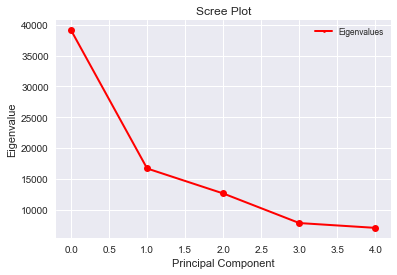

In [117]:
plt.plot(pca.column_correlations(customer_data).columns.values, pca.eigenvalues_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


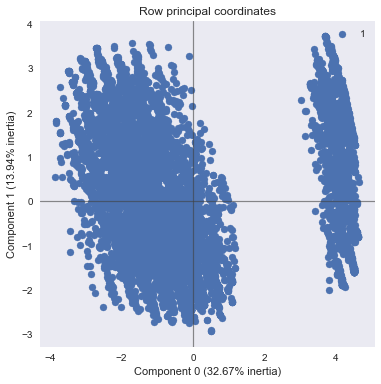

In [118]:
pca.plot_row_coordinates(customer_data)

our first component is the internet user component, and is our most valueable customer class. The second component is predominantly long-standing customers with dependents.

In [119]:
X = pca.transform(customer_data)
Y = churn_column
X = X.drop(columns=[2,3,4], axis=1)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1
0,0.054437,-1.501390
1,-0.061092,-0.464945
2,-0.224720,-2.066724
3,-0.828487,-0.148675
4,0.198302,-2.073248


In [120]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [121]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

In [122]:
xtrain.shape

(5282, 2)

In [123]:
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
ypredict = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(ytest, ypredict)
confusion_mtx

array([[1155,  143],
       [ 257,  206]], dtype=int64)

In [125]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.77


In [126]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredict))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      1298
          1       0.59      0.44      0.51       463

avg / total       0.76      0.77      0.76      1761



In [127]:
classifier.coef_

array([[-0.22923053, -0.91791731]])

First one is for the Internet User and the Second is for our long-term dependent customers under contract

In [219]:
plt.scatter(classifier.predict_proba(X[1]), Y)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.50139032 -0.46494454 -2.06672384 ... -0.48742441 -1.59228469
  0.74661905].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.